### **14 - Agrupar valores de una columna**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **`>` groupby( )**

##### Ejemplo 1

In [6]:
df = pd.read_csv('worldcup2014.csv')
df.head()

,team,continent,group,group_pos,cantidad_juegos,juegos_ganados,juegos_empatados,juegos_perdidos,goles_favor,goles_contra,goles_diferencia,puntos,clasificado
0,Brazil,southamerica,A,1,3,2,1,0,7,2,5,7,1
1,Mexico,northamerica,A,2,3,2,1,0,4,1,3,7,1
2,Croatia,europe,A,3,3,1,0,2,6,6,0,3,0
3,Cameroon,africa,A,4,3,0,0,3,1,9,−8,0,0
4,Netherlands,europe,B,1,3,3,0,0,10,3,7,9,1


In [10]:
# Forma 1
# Clasificado = 0 (No), Clasificado = 1 (Si)
df.groupby('continent')['clasificado'].value_counts()

continent     clasificado
africa        0              3
              1              2
asia          0              4
europe        0              7
              1              6
northamerica  1              3
              0              1
southamerica  1              5
              0              1
Name: clasificado, dtype: int64

In [12]:
# Forma 2
# Clasificado = 0 (No), Clasificado = 1 (Si)
df.groupby('continent').clasificado.value_counts()

continent     clasificado
africa        0              3
              1              2
asia          0              4
europe        0              7
              1              6
northamerica  1              3
              0              1
southamerica  1              5
              0              1
Name: clasificado, dtype: int64

In [13]:
df.groupby('continent').clasificado.value_counts('%')

continent     clasificado
africa        0              0.600000
              1              0.400000
asia          0              1.000000
europe        0              0.538462
              1              0.461538
northamerica  1              0.750000
              0              0.250000
southamerica  1              0.833333
              0              0.166667
Name: clasificado, dtype: float64

In [14]:
df.groupby('continent').clasificado.value_counts('%').round(2)

continent     clasificado
africa        0              0.60
              1              0.40
asia          0              1.00
europe        0              0.54
              1              0.46
northamerica  1              0.75
              0              0.25
southamerica  1              0.83
              0              0.17
Name: clasificado, dtype: float64

##### Ejemplo 2

In [ ]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.head(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region']]
hdi_group.shape

(194, 4)

In [ ]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean'])
hdi_group

,cname,ccode,undp_hdi,ht_region,region_recod
0,Afghanistan,4,0.479,8,SouthAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SubSaharian
...,...,...,...,...,...
189,Uzbekistan,860,0.697,1,EastEurope
190,Venezuela,862,0.769,2,LatAm
191,Samoa,882,0.702,9,Pacific
192,Yemen,887,0.499,3,NorthAfrica


In [ ]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

#### **`>` groupby / agg**

In [4]:
df = pd.read_csv('flights.csv')
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [3]:
dp = pd.read_csv('datos_persona.csv')
dp

,indice,sexo,altura,peso,nombre
0,0,F,1.64,68,Javiera
1,1,M,1.53,43,Jose
2,2,M,1.87,90,Tomas
3,3,F,1.67,95,Maria
4,4,M,2.01,100,Jose
5,5,F,1.45,50,Magdalena
6,6,F,1.67,67,Trinidad
7,7,M,1.93,102,Gonzalo
8,8,M,1.72,76,David
9,9,M,1.64,68,Javier


##### Ejemplo 1
Calcular el **`PROMEDIO DEL PESO`** según el **`SEXO`**

In [4]:
dp.groupby('sexo').mean()

,indice,altura,peso
sexo,,,
F,3.500000,1.607500,70.000000
M,5.166667,1.783333,79.833333


In [5]:
dp.groupby('sexo')['peso'].mean()

sexo
F    70.000000
M    79.833333
Name: peso, dtype: float64

##### Ejemplo 2
Calcular el **`PROMEDIO DEL PESO`** según el **`SEXO`**

In [6]:
dp.groupby('sexo').agg({'peso':'mean'})

,peso
sexo,
F,70.000000
M,79.833333


##### Ejemplo 3
Calcular el **`PROMEDIO DEL PESO`** según el **`SEXO`**

In [7]:
dp.groupby('sexo').agg({'peso':np.mean})

,peso
sexo,
F,70.000000
M,79.833333


<AxesSubplot:xlabel='sexo'>

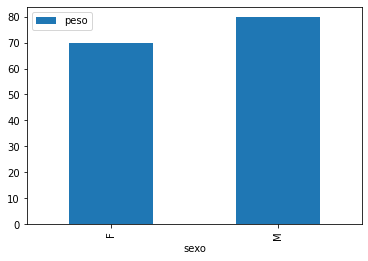

In [8]:
dp.groupby('sexo').agg({'peso':np.mean}).plot(kind='bar')

<AxesSubplot:xlabel='sexo'>

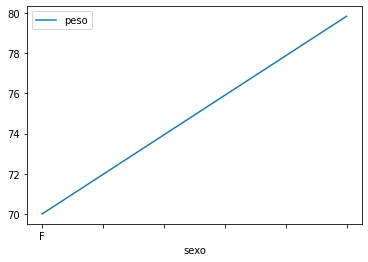

In [9]:
dp.groupby('sexo').agg({'peso':np.mean}).plot()

##### Ejemplo 4
Calcular el **`PROMEDIO DE PASAJEROS`** según el **`AÑO`** y el **`MES`**

In [10]:
df.groupby(['year','month']).agg({'passengers':'mean'})

passengers
year month                
1949 April           129.0
     August          148.0
     December        118.0
     February        118.0
     January         112.0
...                    ...
1960 March           419.0
     May             472.0
     November        390.0
     October         461.0
     September       508.0

[144 rows x 1 columns]

##### Ejemplo 5
Calcular el **`PROMEDIO, MEDIANA, DESVIACION ESTANDAR, MINIMO Y MAXIMO DE PASAJEROS`** según el **`AÑO`**

In [11]:
df.groupby('year').agg({'passengers':['mean','median','std','min','max']})

passengers                            
            mean median        std  min  max
year                                        
1949  126.666667  125.0  13.720147  104  148
1950  139.666667  137.5  19.070841  114  170
1951  170.166667  169.0  18.438267  145  199
1952  197.000000  192.0  22.966379  171  242
1953  225.000000  232.0  28.466887  180  272
1954  238.916667  231.5  34.924486  188  302
1955  284.000000  272.0  42.140458  233  364
1956  328.250000  315.0  47.861780  271  413
1957  368.416667  351.5  57.890898  301  467
1958  381.000000  360.5  64.530472  310  505
1959  428.333333  406.5  69.830097  342  559
1960  476.166667  461.0  77.737125  390  622

##### Ejemplo 6
Calcular el **`VARIANZA DEL PESO`** según el **`SEXO`** utilizando **`Numpy`** y **`Pandas`**

In [12]:
dp.groupby('sexo').agg({'peso':[np.var, 'var']})

peso            
             var         var
sexo                        
F     346.000000  346.000000
M     502.566667  502.566667

##### Ejemplo 7
Calcular el **`PROMEDIO DE ALTURA Y PESO`** según el **`SEXO`**

In [13]:
dp.groupby('sexo').agg({'altura':'mean', 'peso':'mean'})

,altura,peso
sexo,,
F,1.607500,70.000000
M,1.783333,79.833333


##### Ejemplo 8
Calcular la **`SUMA DE PASAJEROS`** según el **`AÑO`**

In [14]:
df.groupby('year').agg({'passengers':'sum'})

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


<AxesSubplot:xlabel='year'>

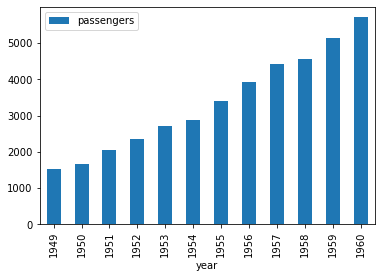

In [21]:
df.groupby('year').agg({'passengers':'sum'}).plot(kind='bar')

#### **`>` groupby / agg / index**

En **`groupby`**, la(s) columna(s) que agrupamos se convierte(n) en el indice del Dataframe

In [15]:
result = df.groupby('year').agg({'passengers':'sum'})

type(result)

pandas.core.frame.DataFrame

In [16]:
result.index

Int64Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960],
           dtype='int64', name='year')

#### **`>` groupby / agg / reset_index**

- En **`groupby`**, la(s) columna(s) que agrupamos se convierte(n) en el indice del Dataframe
- Para agregar un indice numerico y no utilizar las columnas agrupadas como indice debemos utilizar el metodo **`reset_index()`**

In [17]:
result = df.groupby('year').agg({'passengers':'sum'})

type(result)

pandas.core.frame.DataFrame

In [18]:
# Utilizando el metodo directamente podemos agregar un indice
result.reset_index()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [19]:
# Si no usamos el metodo el Dataframe se mantiene igual que siempre
result

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421
